[ -1.63113519e-01   2.63024369e+02] 
 [   9.76730396  124.57217382]


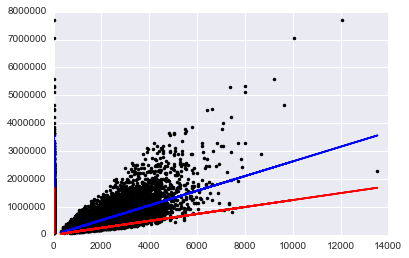

In [7]:
import pandas as pd
import numpy as np
import math
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

dtype_dict = {'bathrooms': float, 'waterfront': int, 'sqft_above': int, 'sqft_living15': float,
              'grade': int, 'yr_renovated': int, 'price': float, 'bedrooms': float, 'zipcode': str, 'long': float,
              'sqft_lot15': float, 'sqft_living': float, 'floors': str, 'condition': int, 'lat': float, 'date': str,
              'sqft_basement': int, 'yr_built': int, 'id': str, 'sqft_lot': int, 'view': int}

train_data = pd.read_csv(
    "../datasets/kc_house_train_data.csv", dtype=dtype_dict)
test_data = pd.read_csv(
    "../datasets/kc_house_test_data.csv", dtype=dtype_dict)

def get_numpy_data(data_frame, features, output):

    data_frame['intercept'] = 1
    features = ['intercept'] + features

    features_matrix = data_frame[features].as_matrix()

    output_array = data_frame[output].values
    return (features_matrix, output_array)


def predict_outcome(feature_matrix, weights):

    return np.dot(feature_matrix, weights)


def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):

    rss_derivative = 2 * np.dot(errors, feature)
    if feature_is_constant:

        return  rss_derivative

    else:
        l2_derivative = 2 * l2_penalty * weight
        return (rss_derivative + l2_derivative)


def ridge_regression_gradient_discent(feature_matrix, output, initial_weights, step_size, l2_penalty,
                                      max_iterations = 100):

    weights = np.array(initial_weights)
    iterations = 0
    while iterations < max_iterations:

        for i in range(len(weights)):
            if i == 0:
                feature_is_constant = True
            else:
                feature_is_constant = False
            errors = predict_outcome(feature_matrix, weights) - output
            weights[i] -= step_size * feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, feature_is_constant)
        iterations = iterations + 1
#         print(iterations)

    return weights

simple_features = ['sqft_living']
my_output = 'price'

(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

step_size = 1e-12
max_iterations = 1000
initial_weights = [0., 0.]
high_penalty = 1e11

simple_weights_0_penalty = ridge_regression_gradient_discent(simple_feature_matrix, output, initial_weights, step_size,
                                                             0.0,
                                                             max_iterations)
simple_weights_high_penalty = ridge_regression_gradient_discent(simple_feature_matrix, output, initial_weights, step_size,
                                                                high_penalty,
                                                                max_iterations)

print(simple_weights_0_penalty, '\n', simple_weights_high_penalty)

%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_outcome(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [8]:
def calrss(input_features, output, clf):

    # hw = np.dot(input_features.as_matrix(),coef.T)
    # rss_sum = (output.as_matrix()-hw) * (output.as_matrix()-hw)
    rss_sum =((output - clf.predict(input_features)) ** 2)

    return sum(rss_sum)

rss_zero_weights = sum((test_output-predict_outcome(simple_test_feature_matrix, [0., 0.])) ** 2)
rss_zero_penalty = sum((test_output-predict_outcome(simple_test_feature_matrix, simple_weights_0_penalty)) ** 2)
rss_high_penalty = sum((test_output-predict_outcome(simple_test_feature_matrix, simple_weights_high_penalty)) ** 2)

print("zero {:e}, no penalty {:e}, high penalty {:e}".format(rss_zero_weights, rss_zero_penalty, rss_high_penalty))

zero 1.784273e+15, no penalty 2.757236e+14, high penalty 6.946421e+14


In [9]:
model_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

step_size = 1e-12
max_iterations = 1000
initial_weights = [0., 0., 0.0]
high_penalty = 1e11

multiple_weights_0_penalty = ridge_regression_gradient_discent(feature_matrix, output, initial_weights,
                                                              step_size,
                                                              0.,
                                                              max_iterations)

multiple_weights_high_penalty = ridge_regression_gradient_discent(feature_matrix, output, initial_weights,
                                                              step_size,
                                                              high_penalty,
                                                              max_iterations)

print("no penalty {}, high {}".format(multiple_weights_0_penalty[1], multiple_weights_high_penalty[1]))

rss_zero_weights = sum((test_output-predict_outcome(test_feature_matrix, [0., 0., 0.])) ** 2)
rss_zero_penalty = sum((test_output-predict_outcome(test_feature_matrix, multiple_weights_0_penalty)) ** 2)
rss_high_penalty = sum((test_output-predict_outcome(test_feature_matrix, multiple_weights_high_penalty)) ** 2)

print("zero {:e}, no penalty {:e}, high penalty {:e}".format(rss_zero_weights, rss_zero_penalty, rss_high_penalty))


no_penalty_first = (test_output-predict_outcome(test_feature_matrix, multiple_weights_0_penalty))[0]
hight_penalty_first = (test_output-predict_outcome(test_feature_matrix, multiple_weights_high_penalty))[0]

print(no_penalty_first, '\n', hight_penalty_first)

no penalty 243.17980962429283, high 91.48927227428833
zero 1.784273e+15, no penalty 2.740738e+14, high penalty 5.004048e+14
-77401.5154929 
 39546.4708566
